# Teste de aderência

Testes de aderência (chamados de *Goodness-of-Fit Tests*) medem o quanto uma distribuição ajusta bem um conjunto de dados.

Este IPython Notebook apresenta algumas métricas que podem ser usadas como testes de aderência. 


Vamos retomar os dados utilizados no **Encontro 9**, em que fizemos um estudo da exponencial.



In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
t = [0.4208639898896666,1.03188356967095,0.13040260163129186,0.41610175281579204,0.06276913945145514,0.2604527897051626,1.0653266302864743,0.3999132796354898,0.42488628912459503,0.07322160044222299,0.7788440344892682,0.4809047924839859,3.1662961779893104,0.13517136007538105,0.9911063979429706,0.5343190754793641,0.6876360536196762,1.1715115568117145,0.7491057610982774,0.3061493940163866,1.1401426544049469,0.4605043742242713,2.456062692069534,0.012487224889989377,0.18141741576822554,0.4586567601244191,2.648654975378037,0.8212260803335529,2.556685790926582,0.24363854986923186,0.5043634472248774,0.3850646131081359,0.9383836320463204,1.616050759082904,0.4318069698508348,1.1301796644644162,0.6184884500435972,0.9492451371761736,0.2790196240640298,0.04961568366899823,0.4088031337781835,0.4087471743923208,0.4494033466793825,0.5457447979822463,0.09515858152409562,2.485084847074356,0.3141759719532281,0.31898964997233353,0.3597208152016496,0.7054846837608482,0.06346474891023993,0.42937800298606177,4.017271867379598,3.1172618083666186,0.6683680435620208,0.3023678887161766,0.5161684120377931,0.8728467252105423,3.2901738831775567,0.6327958196166577,0.6949470960125295,0.9389851261636534,0.6786171771585701,1.1844784492256475,1.1247511965155452,1.5289331569805658,0.5495519489108373,0.11264678366504452,0.7486877476719411,0.3382404261243344,0.022013211240308268,0.24888081378405774,0.7513425827880821,1.0860594866107964,0.5737882396971098,0.9487210483143668,0.1131467364790502,0.19045611347164626,0.1109576329589732,2.154792746756326,0.044699462390588814,1.6797668367622791,0.3831425877414263,0.14889949673181568,1.4946909373332815,2.5345029332586155,0.7108279701771155,0.7458977301489557,0.1608921688737837,2.7765319087924265,0.3950574724087289,0.3099611943201184,1.1826165765250298,0.6329748525886519,5.651269831977362,0.29277569947851145,0.030482805513611294,0.34845088960007026,0.4865161356865777,0.6856973857630049]

In [4]:
tempos = pd.Series(data=sorted(t))

## Histograma dos dados

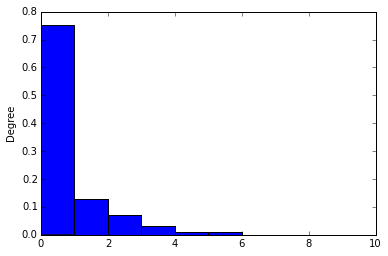

In [22]:


# histograma e densidade teórica
pd.DataFrame.plot(kind='hist', data=tempos, bins=range(0, 11), normed=True, legend=False)


Os dados acima parecem adequados a serem ajustados por uma *função de densidade de probabilidade* exponencial.


Vamos tentar ajustá-los também por uma função *Gamma* para que possamos ter duas alternativas a comparar.

**Exponencial**
Lembremos que a exponencial necessita de um único parâmetro $\alpha=\frac{1}{\mu}$, em que $\mu$ é a média da distribuição.

Desta forma temos como estimativas para a exponencial:

$\alpha_{estimado} = \frac{1}{\bar{x}}$, onde $\bar{x}$ é a média amostral


**Gamma**
A função *Gamma* necessita de parâmetros $k$ e $\theta$.
Vale a propriedade $E(X) = k\theta$

Para a gamma temos a estimativa:

$k\theta = \bar{x}$

Dado o formato do histograma, $k = 1.65$ parece ser uma boa estimativa para este parâmetro da *gamma*. 

<font color=red> Quando $k = 1$ a distribuição *gamma* se transforma em exponencial




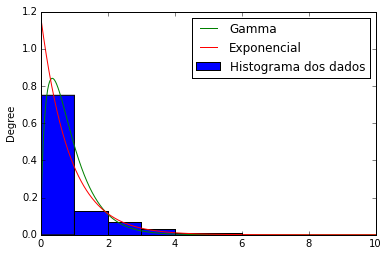

In [21]:
mu_exp = tempos.mean()

# k para a gamma é escolhido entre 1 e 2 baseado na forma do histograma e no efeito que k tem na forma da gamma
k_gamma = 1.65

# Estimamos theta da distribuição gamma
theta_gamma = tempos.mean()/k_gamma


x = np.linspace(0, 10, 1000)

fig = plt.figure(figsize=(14,10))


# histograma e densidade teórica
pd.DataFrame.plot(kind='hist', data=tempos, bins=range(0, 11), normed=True, label="Histograma dos dados")
exponencial = stats.expon.pdf(x, scale=mu_exp)
gamma = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)


plt.plot(x, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.plot(x, exponencial, '-', color='red', label="Exponencial") # Plota a exponencial teórica

plt.legend()


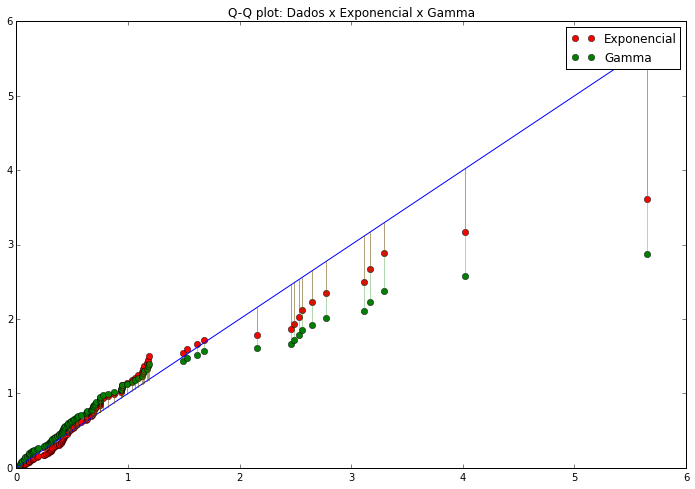

In [7]:
# dados ordenados e quantis teóricos - QQplot

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(tempos)):
  fra.append((i - 0.5) / len(tempos)) # ver Magalhães e Lima (pag. 195)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_exp = stats.expon.ppf(fra, scale=mu_exp) # quantis teóricos da exponencial
q_gamma = stats.gamma.ppf(fra, scale=theta_gamma, loc=0, a=k_gamma)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot, = plt.plot(tempos, q_exp, 'o', color="red", label="Exponencial")
gamma_plot, = plt.plot(tempos, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot, gamma_plot])
plt.plot((min(tempos), max(tempos)), (min(tempos), max(tempos)), '-')


for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (q_exp[i], tempos[i]), '-', color='red', alpha=0.3  )
    plt.plot((tempos[i], tempos[i]), (q_gamma[i], tempos[i]), '-', color='green', alpha=0.3  )



No gráfico anterior, as linhas verticais indicam a diferença entre os dados e os quantis teóricos das distribuições analisadas



## 1. Testes de aderência que usam a diferença entre quantis

Precisamos de uma forma de quantificar o quanto a distribuição teórica está afastada dos dados. Existem algumas estratégias possíveis:

### 1.1 Erro quadrático

O erro quadrático é a soma das diferenças entre o valor do quantil teórico da distribuição e o valor encontrado nos dados. 



In [8]:
def erro_quadratico(fra_dados, quantil_teorico):
    import math
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        if not math.isnan(quantil_teorico[i]): # ppf retorna NaN para valores em extremos da cumulativa
            dif_quad = (fra_dados[i] - quantil_teorico[i])**2
            eq = eq + dif_quad
    return eq

erro_quadratico_exponencial = erro_quadratico(tempos, q_exp)
erro_quadratico_gamma = erro_quadratico(tempos, q_gamma)

print("Erro quadratico da exponencial :", erro_quadratico_exponencial)
print("Erro quadratico da gamma :", erro_quadratico_gamma)


Erro quadratico da exponencial : 8.06994214958
Erro quadratico da gamma : 17.288283881


### 1.2 Erro quadrático médio

Podemos fazer a média do erro quadrático.

In [9]:
eqm_exp = erro_quadratico_exponencial/len(tempos)
eqm_gamma = erro_quadratico_gamma/len(tempos)

print("Erro quadratico médio da exponencial :", eqm_exp)
print("Erro quadratico médio da gamma :", eqm_gamma)

Erro quadratico médio da exponencial : 0.0806994214958
Erro quadratico médio da gamma : 0.17288283881


A partir dos valores calculados em 1.1 e 1.2, pode-se concluir que no teste de aderência a *exponencial* com `scale` valendo  **`mu_exp`** ajustou melhor os dados que a *gamma* com parâmetros **`scale=theta_gamma`**, **`loc=0`** e  **`a=k_gamma`**



### 1.2 Soma de diferenças

Podemos adaptar o código desenvolvido anteriormente para gerar um teste de aderência baseado no módulo da soma das diferenças. 




In [10]:
def soma_diferencas(fra_dados, quantil_teorico):
    import math
    """ Calcula o quadrado das diferenças entre duas listas de mesmo tamanho"""
    eq = 0
    for i in range(len(fra_dados)):
        if not math.isnan(quantil_teorico[i]): # ppf retorna NaN para valores em extremos da cumulativa
            dif_quad = abs(fra_dados[i] - quantil_teorico[i])
            eq = eq + dif_quad
    return eq

soma_diferenças_exponencial = soma_diferencas(tempos, q_exp)
soma_diferenças_gamma = soma_diferencas(tempos, q_gamma)

print("Soma de diferenças da exponencial :", soma_diferenças_exponencial)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)


Soma de diferenças da exponencial : 13.9867671035
Soma de diferenças da gamma : 21.1604765491


Vemos que com a nova métrica a *gamma* com os parâmetros que usamos continua tendo menos aderência que a exponencial

## 2. Testes de aderência que usam a cumulativa

As linhas em roxo ligam a diferença entre a função cumulativa de probabilidade teórica e aquela observada nos dados

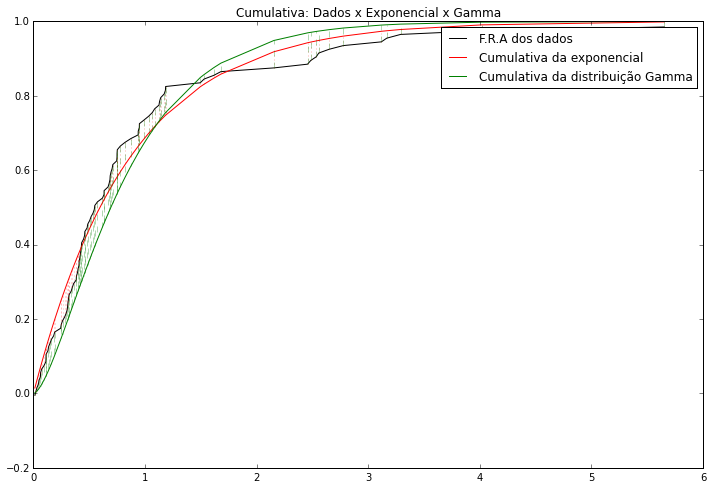

In [11]:
# fra e FDA
cdf_exponencial = stats.expon.cdf(tempos, scale=mu_exp) #FDA
cdf_gamma = stats.gamma.cdf(tempos, scale=theta_gamma, loc=0, a=k_gamma)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Gamma")

dados_fra_plot, = plt.plot(tempos, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(tempos, cdf_exponencial, '-', color='red', label = "Cumulativa da exponencial")
cdf_gamma_plot, = plt.plot(tempos, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])


for i in range(len(tempos)):
    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
    

Desta vez não precisamos usar *loops* porque a função que calcula a cdf devolve um *array* do numpy. O teste do Q-Q-Plot foi feito usando listas comuns do Python.


## 2.1  Erro quadrático nas CDFs

In [12]:
# Erro quadrático nas CDFs
erro_quad_cdf_exponencial = sum((fra - cdf_exponencial)**2)

erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)


In [24]:
print("Erro quadrático da CDF da Exponencial versus F.R.A", erro_quad_cdf_exponencial)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)


Erro quadrático da CDF da Exponencial 0.16490188037
Erro quadrático da CDF da Gamma 0.467835799446


A partir dos resultados acima, vemos que o erro quadrático da cumulativa é menor no caso da exponencial com os parâmetros testados. Portanto a **exponencial com estes parâmetros testados oferece o melhor ajuste**. 

## 2.2 Diferenças absolutas

In [28]:
# Diferenças absolutas
soma_difs_cdf_expoencial = sum( abs(fra - cdf_exponencial))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_expoencial, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da exponencial versus F.R.A: 3.5758725353002494 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 6.212439770883716


A partir dos resultados acima, vemos que o erro da soma do módulo das diferenças entre f.r.a e cumulativa é menor no caso da exponencial com os parâmetros testados. Portanto a **exponencial com estes parâmetros testados oferece o melhor ajuste**. 

## 2.2 Teste de aderência de Kolmogorov-Smirnov

O [teste de aderência de Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), também chamado de **Teste K-S**, propõe que simplesmente usemos a máxima discrepância entre a frequência relativa acumulada encontrada nos dados e a cumulativa da distribuição teórica

In [37]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_exp = max(abs(fra-cdf_exponencial))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))


print("Teste K-S para a exponencial com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}  {:4.3f}:".format(mu_exp, ks_aderencia_exp, theta_gamma, k_gamma, ks_aderencia_gamma))

Teste K-S para a exponencial com μ= 0.86: 0.077
Teste K-S para a gamma com scale=0.521, loc=0 e a=1.650  0.117:


A partir dos resultados do Teste K-S, vemos que a aderência é menor com a distribuição *gamma*, portanto entre as duas o melhor ajuste é oferecido pela exponencial com  $\mu$= 0.8.